In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
%matplotlib inline

# Arquivo csv com os dados, sem a extensão.
filename = 'sub4'

In [4]:
df = pd.read_csv(f"../eval/{filename}.csv")
df.head()

n  n_threads     wtime
0   1000          1  0.192840
1  10000          1  6.753035
2   1000          2  0.129891
3  10000          2  4.092310
4   1000          4  0.131692

In [5]:
t0 = df[df["n_threads"] == 1].groupby(by=["n"]).mean()["wtime"]
t0

n
1000     0.193265
10000    6.591018
Name: wtime, dtype: float64

In [6]:
df['mean_wtime_sequential'] = df['n'].transform(lambda n: t0[n])
df.head()

n  n_threads     wtime  mean_wtime_sequential
0   1000          1  0.192840               0.193265
1  10000          1  6.753035               6.591018
2   1000          2  0.129891               0.193265
3  10000          2  4.092310               6.591018
4   1000          4  0.131692               0.193265

In [7]:
df["speedup"] = df['mean_wtime_sequential'] / df["wtime"]
df["efficiency"] = df["speedup"] / df["n_threads"]
df.head()

n  n_threads     wtime  mean_wtime_sequential   speedup  efficiency
0   1000          1  0.192840               0.193265  1.002204    1.002204
1  10000          1  6.753035               6.591018  0.976008    0.976008
2   1000          2  0.129891               0.193265  1.487901    0.743951
3  10000          2  4.092310               6.591018  1.610586    0.805293
4   1000          4  0.131692               0.193265  1.467553    0.366888

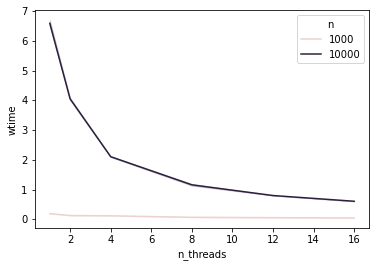

In [8]:
ax = sns.lineplot(x="n_threads", y="wtime", data=df, hue="n")
plt.savefig(f'../eval/{filename}_wtime.png', dpi=400)

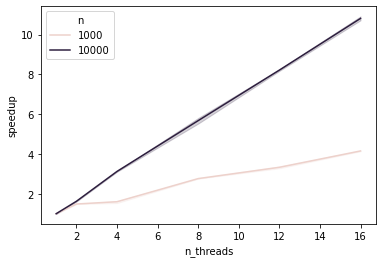

In [9]:
ax = sns.lineplot(x="n_threads", y="speedup", data=df, hue="n")
plt.savefig(f'../eval/{filename}_speedup.png', dpi=400)

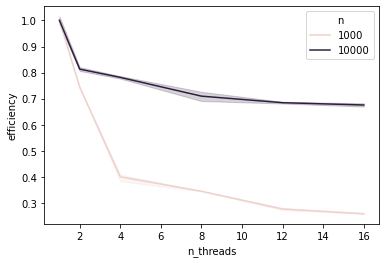

In [10]:
ax = sns.lineplot(x="n_threads", y="efficiency", data=df, hue="n")
plt.savefig(f'../eval/{filename}_efficiency.png', dpi=400)